### Conectando a sql

In [178]:
import pandas as pd
import sqlalchemy as db
from sqlalchemy.sql import text
import getpass
import json

password = getpass.getpass("Insert your mysql root password: ")
engine = db.create_engine('mysql+pymysql://root:{}@localhost/otraoportunidad'.format(password))
print("Connected to server!")

Insert your mysql root password: ········
Connected to server!


### Función que saca los mensajes de un idUser

In [183]:
def query(idUser=0):
    query = """
        SELECT * FROM messages WHERE users_idUser='{}'
    """.format(idUser)
    print("Running query")
    print(query)
    df = pd.read_sql_query(query, engine)
    return df

In [184]:
query(1)

Running query

        SELECT * FROM messages WHERE users_idUser='1'
    


,idMessage,text,datetime,users_idUser,chats_idChat
0,2,Dude!!! 😀️ Did you watch the game last night?,2019-10-17 10:16:59,1,5
1,4,Awesome! Boyander scored 3 goals!,2019-10-17 10:18:41,1,5
2,6,Way...,2019-10-17 10:20:41,1,5
3,8,For sure. We stayed at KuboLoco until 6AM.,2019-10-17 10:22:41,1,5
4,10,"Dead, burried and still suffering! 🤮️",2019-10-17 10:24:41,1,5
5,21,Sweety pie! How Ive longed to talk to you.,2019-10-19 10:15:41,1,2
6,23,"Its Mike, honey bunny. Or doctor LOVE! And you...",2019-10-19 10:17:41,1,2
7,25,Cant handle me on your own?,2019-10-19 10:19:41,1,2
8,27,That would be hot... 🔥️,2019-10-19 10:21:41,1,2
9,29,I NEED VODKA LIKE A CAR NEEDS GAS,2019-10-19 10:23:41,1,2


### FUNCION QUE ME VALIA EL SABADO PARA INTRODUCIR ARCHIVOS JSON EN MI SQL


In [7]:
def addConver(extension_json):
    query = "INSERT INTO {} VALUES {}"
    with engine.connect() as con:

        with open(extension_json) as f:
            chats_json = json.load(f)

        users = list(set([(chats_json[i]['idUser'],chats_json[i]['userName']) for i in range(len(chats_json))]))

        chats = list(set([(chats_json[i]['idChat']) for i in range(len(chats_json))]))

        for user in users:
            q = query.format('users (idUser, userName)',"({}, '{}')".format(user[0],user[1]),'users.idUser')
            print(q)
            try:
                con.execute(q)
                #Get Response
                id = con.fetchone()[0]
                print(f"value inserted: {id}")
            except:
                print("At least I tried")

        
        for chat in chats:
            q = query.format('chats(idChat)',"({})".format(chat),'chats.idChat')
            print(q)
            try:
                con.execute(q)
                #Get Response
                id = con.fetchone()[0]
                print(f"value inserted: {id}")
            except:
                print("At least I tried")

        for message in chats_json:
            q = query.format('messages(idMessage, text, datetime, idUser, idChat)','({},"{}","{}",{},{})'.format(message['idMessage'],message['text'],message['datetime'],message['idUser'],message['idChat'],),'messages.idMessage')
            print(q)
            try:
                con.execute(q)
                #Get Response
                id = con.fetchone()[0]
                print(f"value inserted: {id}")
            except:
                print("At least I tried")

        return print('Done!')



#### Función que busca por la base de datos

In [185]:
def queryTocha(origin_column, table, value_column, value):
    query = """
        SELECT {} FROM {} WHERE {}='{}'
    """.format(origin_column, table, value_column, value)
    print("Running query")
    print(query)
    df = pd.read_sql_query(query, engine)
    return df

In [188]:
queryTocha('text', 'messages', 'users_idUser', 2)

Running query

        SELECT text FROM messages WHERE users_idUser='2'
    


,text
0,Im so angry right now!
1,Impossible! Cant do it! Just cant! He pissed m...
2,But how am I suposed to fix the facial recogni...
3,And who the hell is Tony? 🤯️
4,Oh shit. I think youre friends with my brother.


### FUNCION DEL DOMINGO CON LAS COSAS AUTOINCREMENTADAS PARA INTRODUCIR ARCHIVOS JSON EN SQL


In [37]:
import json
from sqlalchemy.sql import text
import sqlalchemy as db
import getpass

password = getpass.getpass("Insert your mysql root password: ")
engine = db.create_engine('mysql+pymysql://root:{}@localhost/otraoportunidad'.format(password))
print("Connected to server!")

def addConver(extension_json):
    query = "INSERT INTO {} VALUES {}"
    with engine.connect() as con:

        with open(extension_json) as f:
            chats_json = json.load(f)

        users = list(set([(chats_json[i]['idUser'],chats_json[i]['userName']) for i in range(len(chats_json))]))

        chats = list(set([(chats_json[i]['idChat']) for i in range(len(chats_json))]))

        for user in users:
            q = query.format('users (userName)',"('{}')".format(user[1]),'users.idUser')
            print(q)
            try:
                con.execute(q)
                #Get Response
                id = con.fetchone()[0]
                print(f"value inserted: {id}")
            except:
                print("At least I tried")
        
        for chat in chats:
            q = query.format('chats(idChat)',"({})".format(chat),'chats.idChat')
            print(q)
            try:
                con.execute(q)
                #Get Response
                id = con.fetchone()[0]
                print(f"value inserted: {id}")
            except:
                print("At least I tried")

        for message in chats_json:
            q = query.format('messages(text, datetime, users_idUser, chats_idChat)','("{}","{}",{},{})'.format(message['text'],message['datetime'],message['idUser'],message['idChat'],),'messages.idMessage')
            print(q)
            try:
                con.execute(q)
                #Get Response
                id = con.fetchone()[0]
                print(f"value inserted: {id}")
            except:
                print("At least I tried")

        return print('Done!')

Insert your mysql root password: ········
Connected to server!


In [39]:
addConver('chats2.json')

INSERT INTO users (userName) VALUES ('Guzman Crack')
At least I tried
INSERT INTO users (userName) VALUES ('Tony Pons')
At least I tried
INSERT INTO chats(idChat) VALUES (5)
At least I tried
INSERT INTO messages(text, datetime, users_idUser, chats_idChat) VALUES ("Hey dude, have you done the lab?","2019-11-21 23:15:41",8,5)
At least I tried
INSERT INTO messages(text, datetime, users_idUser, chats_idChat) VALUES ("For sure, bitch","2019-11-21 23:16:59",9,5)
At least I tried
Done!


#### Haciendo peticiones a la API

In [189]:
#FUNCIONA
import requests
data = requests.get('http://localhost:8080/Users/1').json()
print(data)

[{'idMessage': 2, 'text': 'Dude!!! 😀️ Did you watch the game last night?', 'datetime': '2019-10-17 10:16:59', 'users_idUser': 1, 'chats_idChat': 5}, {'idMessage': 4, 'text': 'Awesome! Boyander scored 3 goals!', 'datetime': '2019-10-17 10:18:41', 'users_idUser': 1, 'chats_idChat': 5}, {'idMessage': 6, 'text': 'Way...', 'datetime': '2019-10-17 10:20:41', 'users_idUser': 1, 'chats_idChat': 5}, {'idMessage': 8, 'text': 'For sure. We stayed at KuboLoco until 6AM.', 'datetime': '2019-10-17 10:22:41', 'users_idUser': 1, 'chats_idChat': 5}, {'idMessage': 10, 'text': 'Dead, burried and still suffering! 🤮️', 'datetime': '2019-10-17 10:24:41', 'users_idUser': 1, 'chats_idChat': 5}, {'idMessage': 21, 'text': 'Sweety pie! How Ive longed to talk to you.', 'datetime': '2019-10-19 10:15:41', 'users_idUser': 1, 'chats_idChat': 2}, {'idMessage': 23, 'text': 'Its Mike, honey bunny. Or doctor LOVE! And youre a sick little girl.', 'datetime': '2019-10-19 10:17:41', 'users_idUser': 1, 'chats_idChat': 2}, {'

### Añadiendo elementos con la API

In [41]:
userid = requests.post("http://localhost:8080/user/create/Marc%20Pomar").json()
print(userid)

[{"idUser":12,"userName":"Marc Pomar"}]


In [175]:
new_name = {'name': 'Capitana Bego'}
userid = requests.post("http://localhost:8080/user/create", data=new_name).json()
print(userid)

[{"idUser":16,"userName":"Capitana Bego"}]


In [176]:
chatid = requests.post("http://localhost:8080/chat/create").json()
print(chatid)

{'13': 'Created chat'}


In [177]:
new_message = {'user_id': '12', 'text': 'Guys, calm down, the lab will be 20 minutes maximum'}
messageid = requests.post("http://localhost:8080/chat/1/addmessage", data=new_message).json()
print(messageid)

[{"idMessage":58}]


### Haciendo peticiones a la API

In [191]:
messages = requests.get("http://localhost:8080/chat/1/list").json()
x = json.loads(messages)
print(len(messages[0]), messages, len(json.loads(messages)))

1 [{"text":"Im so angry right now!"},{"text":"I saw you this morning. You shouldnt get so upset. \u2764\ufe0f"},{"text":"Impossible! Cant do it! Just cant! He pissed me off so much."},{"text":"Dont get so frustrated, Leia. Remember what German said."},{"text":"But how am I suposed to fix the facial recognition system if it doesnt even work?"},{"text":"Im sure you will find a way."},{"text":"And who the hell is Tony? \ud83e\udd2f\ufe0f"},{"text":"I am Iron Man"},{"text":"Oh shit. I think youre friends with my brother."},{"text":"Uh-Oh. Better fix that quickly."},{"text":"Hello World!!"},{"text":"Im so happy, i have get a cat in codewars"},{"text":"Guys, calm down, the lab will be 20 minutes maximum"}] 13


### SACANDO SENTIMIENTOS


In [26]:
import nltk # install nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

for sent in x:
    print("{}: {}".format(sent['text'], sid.polarity_scores(sent['text'])))

Im so angry right now!: {'neg': 0.493, 'neu': 0.507, 'pos': 0.0, 'compound': -0.5974}
I saw you this morning. You shouldnt get so upset. ❤️: {'neg': 0.272, 'neu': 0.728, 'pos': 0.0, 'compound': -0.5214}
Impossible! Cant do it! Just cant! He pissed me off so much.: {'neg': 0.0, 'neu': 0.722, 'pos': 0.278, 'compound': 0.6421}
Dont get so frustrated, Leia. Remember what German said.: {'neg': 0.353, 'neu': 0.647, 'pos': 0.0, 'compound': -0.656}
But how am I suposed to fix the facial recognition system if it doesnt even work?: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Im sure you will find a way.: {'neg': 0.0, 'neu': 0.685, 'pos': 0.315, 'compound': 0.3182}
And who the hell is Tony? 🤯️: {'neg': 0.434, 'neu': 0.566, 'pos': 0.0, 'compound': -0.6808}
I am Iron Man: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Oh shit. I think youre friends with my brother.: {'neg': 0.283, 'neu': 0.472, 'pos': 0.244, 'compound': -0.128}
Uh-Oh. Better fix that quickly.: {'neg': 0.0, 'neu': 0

In [192]:
def analyseMessages(chat_id):
    query = """
        SELECT text FROM messages WHERE chats_idChat='{}'
    """.format(chat_id)
    print(f"Running query: {query}")
    df = pd.read_sql_query(query, engine)
    new = df.to_json(orient='records')
    respond = json.loads(new)
    lst=[]
    for sent in respond:
        lst.append({sent['text'] : sid.polarity_scores(sent['text'])})
    
    return lst

In [198]:
otro = analyseMessages(4)
otro

Running query: 
        SELECT text FROM messages WHERE chats_idChat='4'
    


[{'REDRUM': {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}},
 {'What was that?': {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}},
 {'REDRUM REDRUM REDRUM': {'neg': 0.0,
   'neu': 1.0,
   'pos': 0.0,
   'compound': 0.0}},
 {'Did you mean red room? Id love a red room.': {'neg': 0.0,
   'neu': 0.656,
   'pos': 0.344,
   'compound': 0.6369}},
 {'Murder, bro, cold blooded splashy murderous fun': {'neg': 0.549,
   'neu': 0.247,
   'pos': 0.204,
   'compound': -0.765}},
 {'Chill out, pinky.. Its such a nice day': {'neg': 0.0,
   'neu': 0.682,
   'pos': 0.318,
   'compound': 0.4215}},
 {'A nice day to create havoc!': {'neg': 0.352,
   'neu': 0.18,
   'pos': 0.468,
   'compound': 0.0752}},
 {'Ill go for a walk in the park, I guess. Maybe fishing': {'neg': 0.237,
   'neu': 0.763,
   'pos': 0.0,
   'compound': -0.4215}},
 {'Fishing sounds good. What about the labyrinth?': {'neg': 0.0,
   'neu': 0.674,
   'pos': 0.326,
   'compound': 0.4404}},
 {'No! That places creeps me out..': {'n

### Petición de sentimientos a la API

In [200]:
data = requests.get('http://localhost:8080/chat/2/sentiment').json()
print(data)

[{'user media': {'neg': 0.065, 'neu': 0.854, 'pos': 0.081}}, {'Sweety pie! How Ive longed to talk to you.': {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}}, {'Not again, Michael.... 😒️': {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}}, {'Its Mike, honey bunny. Or doctor LOVE! And youre a sick little girl.': {'neg': 0.178, 'neu': 0.54, 'pos': 0.282, 'compound': 0.4451}}, {'Im gonna report you to Human Resources again, Michael.': {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}}, {'Cant handle me on your own?': {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}}, {'Id rather have a fucking alien crawling out of my ass': {'neg': 0.28, 'neu': 0.72, 'pos': 0.0, 'compound': -0.5423}}, {'That would be hot... 🔥️': {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}}, {'Ok, youve got to stop drinking! Im calling HR.': {'neg': 0.193, 'neu': 0.614, 'pos': 0.193, 'compound': 0.0}}, {'I NEED VODKA LIKE A CAR NEEDS GAS': {'neg': 0.0, 'neu': 0.667, 'pos': 0.333, 'compound': 0.

In [201]:
#MEDIA DE LOS SENTIMIENTOS
x = sum([v['neg'] for dat in data for k, v in dat.items()])/len(data)
y = sum([v['neu'] for dat in data for k, v in dat.items()])/len(data)
z = sum([v['pos'] for dat in data for k, v in dat.items()])/len(data)
print(x, y, z)

0.06509090909090909 0.854090909090909 0.08081818181818182


In [346]:
import requests
texto1 = requests.get('http://localhost:8080/Users/').json()
print(type(texto1))
json.loads(texto1)

<class 'str'>


[{'idUser': 1, 'userName': 'Danny Torrances Finger'},
 {'idUser': 2, 'userName': 'J. Jonah Jameson'},
 {'idUser': 3, 'userName': 'John Wick'},
 {'idUser': 4, 'userName': 'Leia Organa'},
 {'idUser': 5, 'userName': 'Danny Torrance'},
 {'idUser': 6, 'userName': 'Tony Stark'},
 {'idUser': 7, 'userName': 'Mike Wazowski'},
 {'idUser': 8, 'userName': 'Ellen Ripley'},
 {'idUser': 9, 'userName': 'Guzman Crack'},
 {'idUser': 10, 'userName': 'Tony Pons'},
 {'idUser': 11, 'userName': 'Paquito'},
 {'idUser': 12, 'userName': 'Marc Pomar'},
 {'idUser': 13, 'userName': 'None'},
 {'idUser': 14, 'userName': 'None'},
 {'idUser': 15, 'userName': 'Clarita Malaguita'},
 {'idUser': 16, 'userName': 'Capitana Bego'}]

In [489]:
import requests
texto = requests.get('http://localhost:8080/message/1').json()
texto


[{'userName': 'Danny Torrances Finger',
  'text': 'Dude!!! 😀️ Did you watch the game last night?'},
 {'userName': 'Danny Torrances Finger',
  'text': 'Awesome! Boyander scored 3 goals!'},
 {'userName': 'Danny Torrances Finger', 'text': 'Way...'},
 {'userName': 'Danny Torrances Finger',
  'text': 'For sure. We stayed at KuboLoco until 6AM.'},
 {'userName': 'Danny Torrances Finger',
  'text': 'Dead, burried and still suffering! 🤮️'},
 {'userName': 'Danny Torrances Finger',
  'text': 'Sweety pie! How Ive longed to talk to you.'},
 {'userName': 'Danny Torrances Finger',
  'text': 'Its Mike, honey bunny. Or doctor LOVE! And youre a sick little girl.'},
 {'userName': 'Danny Torrances Finger', 'text': 'Cant handle me on your own?'},
 {'userName': 'Danny Torrances Finger', 'text': 'That would be hot... 🔥️'},
 {'userName': 'Danny Torrances Finger',
  'text': 'I NEED VODKA LIKE A CAR NEEDS GAS'},
 {'userName': 'Danny Torrances Finger', 'text': 'Hello World!!'}]

### RECOMENDACIONES

In [490]:
lista = []
for i in range(1,len(texto1)):
    X1=[]
    for t in requests.get(f'http://localhost:8080/message/{i}').json():
        X1.append(t['text'])
    lista.append(X1)
lista[0]

['Dude!!! 😀️ Did you watch the game last night?',
 'Awesome! Boyander scored 3 goals!',
 'Way...',
 'For sure. We stayed at KuboLoco until 6AM.',
 'Dead, burried and still suffering! 🤮️',
 'Sweety pie! How Ive longed to talk to you.',
 'Its Mike, honey bunny. Or doctor LOVE! And youre a sick little girl.',
 'Cant handle me on your own?',
 'That would be hot... 🔥️',
 'I NEED VODKA LIKE A CAR NEEDS GAS',
 'Hello World!!']

In [479]:
{requests.get(f'http://localhost:8080/message/1').json()[0]['userName'] : ' '.join(lista[0])}

{'Danny Torrances Finger': 'Dude!!! 😀️ Did you watch the game last night? Awesome! Boyander scored 3 goals! Way... For sure. We stayed at KuboLoco until 6AM. Dead, burried and still suffering! 🤮️ Sweety pie! How Ive longed to talk to you. Its Mike, honey bunny. Or doctor LOVE! And youre a sick little girl. Cant handle me on your own? That would be hot... 🔥️ I NEED VODKA LIKE A CAR NEEDS GAS Hello World!!'}

In [475]:
final={}
for i in range(1,len(texto1)):
    if requests.get(f'http://localhost:8080/message/{i}').json() != []:
        final[requests.get(f'http://localhost:8080/message/{i}').json()[0]['userName']] = ' '.join(lista[i-1])

In [476]:
final

{'Danny Torrances Finger': 'Dude!!! 😀️ Did you watch the game last night? Awesome! Boyander scored 3 goals! Way... For sure. We stayed at KuboLoco until 6AM. Dead, burried and still suffering! 🤮️ Sweety pie! How Ive longed to talk to you. Its Mike, honey bunny. Or doctor LOVE! And youre a sick little girl. Cant handle me on your own? That would be hot... 🔥️ I NEED VODKA LIKE A CAR NEEDS GAS Hello World!!',
 'J. Jonah Jameson': 'Im so angry right now! Impossible! Cant do it! Just cant! He pissed me off so much. But how am I suposed to fix the facial recognition system if it doesnt even work? And who the hell is Tony? 🤯️ Oh shit. I think youre friends with my brother.',
 'John Wick': 'I saw you this morning. You shouldnt get so upset. ❤️ Dont get so frustrated, Leia. Remember what German said. Im sure you will find a way. I am Iron Man Uh-Oh. Better fix that quickly.',
 'Leia Organa': 'Not again, Michael.... 😒️ Im gonna report you to Human Resources again, Michael. Id rather have a fucki

In [ ]:
#COSA DE MAIKA
def userMasMensajes():
    with engine.connect() as con:
        users='''SELECT idUser FROM users'''
        users = list(con.execute(users))
        for e in range(1, len(users)):
            mySql_select_query = """SELECT text FROM messages WHERE users_iduser={};""".format(e)
            a = list(con.execute(mySql_select_query))
            yield a

### Como Marc

In [480]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

In [481]:
final.values()

dict_values(['Dude!!! 😀️ Did you watch the game last night? Awesome! Boyander scored 3 goals! Way... For sure. We stayed at KuboLoco until 6AM. Dead, burried and still suffering! 🤮️ Sweety pie! How Ive longed to talk to you. Its Mike, honey bunny. Or doctor LOVE! And youre a sick little girl. Cant handle me on your own? That would be hot... 🔥️ I NEED VODKA LIKE A CAR NEEDS GAS Hello World!!', 'Im so angry right now! Impossible! Cant do it! Just cant! He pissed me off so much. But how am I suposed to fix the facial recognition system if it doesnt even work? And who the hell is Tony? 🤯️ Oh shit. I think youre friends with my brother.', 'I saw you this morning. You shouldnt get so upset. ❤️ Dont get so frustrated, Leia. Remember what German said. Im sure you will find a way. I am Iron Man Uh-Oh. Better fix that quickly.', 'Not again, Michael.... 😒️ Im gonna report you to Human Resources again, Michael. Id rather have a fucking alien crawling out of my ass Ok, youve got to stop drinking! I

In [482]:
count_vectorizer = CountVectorizer()
sparse_matrix = count_vectorizer.fit_transform(final.values())
sparse_matrix

<11x226 sparse matrix of type '<class 'numpy.int64'>'
	with 307 stored elements in Compressed Sparse Row format>

In [483]:
doc_term_matrix = sparse_matrix.todense()
df = pd.DataFrame(doc_term_matrix, 
                  columns=count_vectorizer.get_feature_names(), 
                  index=final.keys())
display(df)

,20,6am,aa,about,again,alcoholics,alien,am,and,angry,...,will,with,work,world,would,www,you,your,youre,youve
Danny Torrances Finger,0,1,0,0,0,0,0,0,2,0,...,0,0,0,1,1,0,2,1,1,0
J. Jonah Jameson,0,0,0,0,0,0,0,1,1,1,...,0,1,1,0,0,0,0,0,1,0
John Wick,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,3,0,0,0
Leia Organa,0,0,1,0,2,1,1,0,0,0,...,0,0,0,0,0,1,1,0,0,1
Danny Torrance,0,0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,1,0,0,3
Tony Stark,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Mike Wazowski,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
Ellen Ripley,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,2,0,0,0
Guzman Crack,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Marc Pomar,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [486]:
from sklearn.metrics.pairwise import cosine_similarity as distance
#from sklearn.metrics.pairwise import euclidean_distances as distance

# Compute Cosine Similarity matrix (or selected distance)
similarity_matrix = distance(df, df)
print(similarity_matrix)

[[1.         0.17765058 0.16288426 0.12248699 0.19858655 0.06018081
  0.18098251 0.19380063 0.13703774 0.07505866 0.        ]
 [0.17765058 1.         0.16601942 0.10032154 0.14638501 0.06900656
  0.06225728 0.2037037  0.         0.0860663  0.14433757]
 [0.16288426 0.16601942 1.         0.11242344 0.12758946 0.02577696
  0.13953488 0.20752427 0.08804509 0.04822428 0.26958193]
 [0.12248699 0.10032154 0.11242344 1.         0.24671758 0.04984448
  0.08993875 0.14045016 0.         0.         0.15638581]
 [0.19858655 0.14638501 0.12758946 0.24671758 1.         0.0808122
  0.07290826 0.11385501 0.         0.03779645 0.12677314]
 [0.06018081 0.06900656 0.02577696 0.04984448 0.0808122  1.
  0.12888482 0.04600437 0.         0.05345225 0.        ]
 [0.18098251 0.06225728 0.13953488 0.08993875 0.07290826 0.12888482
  1.         0.16601942 0.08804509 0.04822428 0.05391639]
 [0.19380063 0.2037037  0.20752427 0.14045016 0.11385501 0.04600437
  0.16601942 1.         0.07856742 0.0860663  0.09622504]
 

,Danny Torrances Finger,J. Jonah Jameson,John Wick,Leia Organa,Danny Torrance,Tony Stark,Mike Wazowski,Ellen Ripley,Guzman Crack,Marc Pomar,Clarita Malaguita
Danny Torrances Finger,1.000000,0.177651,0.162884,0.122487,0.198587,0.060181,0.180983,0.193801,0.137038,0.075059,0.000000
J. Jonah Jameson,0.177651,1.000000,0.166019,0.100322,0.146385,0.069007,0.062257,0.203704,0.000000,0.086066,0.144338
John Wick,0.162884,0.166019,1.000000,0.112423,0.127589,0.025777,0.139535,0.207524,0.088045,0.048224,0.269582
Leia Organa,0.122487,0.100322,0.112423,1.000000,0.246718,0.049844,0.089939,0.140450,0.000000,0.000000,0.156386
Danny Torrance,0.198587,0.146385,0.127589,0.246718,1.000000,0.080812,0.072908,0.113855,0.000000,0.037796,0.126773
Tony Stark,0.060181,0.069007,0.025777,0.049844,0.080812,1.000000,0.128885,0.046004,0.000000,0.053452,0.000000
Mike Wazowski,0.180983,0.062257,0.139535,0.089939,0.072908,0.128885,1.000000,0.166019,0.088045,0.048224,0.053916
Ellen Ripley,0.193801,0.203704,0.207524,0.140450,0.113855,0.046004,0.166019,1.000000,0.078567,0.086066,0.096225
Guzman Crack,0.137038,0.000000,0.088045,0.000000,0.000000,0.000000,0.088045,0.078567,1.000000,0.000000,0.000000
Marc Pomar,0.075059,0.086066,0.048224,0.000000,0.037796,0.053452,0.048224,0.086066,0.000000,1.000000,0.000000


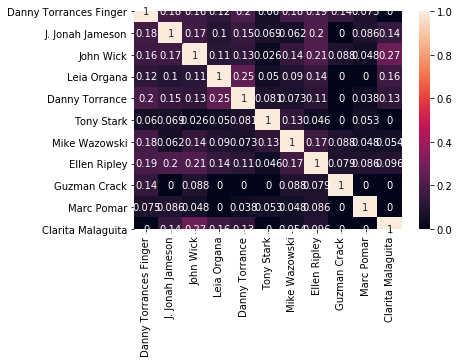

In [487]:
import seaborn as sns
sim_df = pd.DataFrame(similarity_matrix, columns=final.keys(), index=final.keys())
display(sim_df)
sns.heatmap(sim_df,annot=True)

In [488]:
import numpy as np
np.fill_diagonal(sim_df.values, 0)
sim_df.idxmax()

Danny Torrances Finger            Danny Torrance
J. Jonah Jameson                    Ellen Ripley
John Wick                      Clarita Malaguita
Leia Organa                       Danny Torrance
Danny Torrance                       Leia Organa
Tony Stark                         Mike Wazowski
Mike Wazowski             Danny Torrances Finger
Ellen Ripley                           John Wick
Guzman Crack              Danny Torrances Finger
Marc Pomar                      J. Jonah Jameson
Clarita Malaguita                      John Wick
dtype: object

In [ ]:
#INTENTANDO METER A VISUAL
# Recomendations
@get('/recommendation')
def recomm():
    messages = fa.queryUsers()
    respond = json.loads(fa.queryUserandMess(idUser))
    lista = []
    for i in range(1,len(messages)):
        X1=[]
        for t in respond:
            X1.append(t['text'])
        lista.append(X1)
    
    final={}
    for i in range(1,len(texto1)):
        if requests.get(respond[i]) != []:
            final[requests.get(respond[i][0]['userName']] = ' '.join(lista[i-1])
    
    count_vectorizer = CountVectorizer()
    sparse_matrix = count_vectorizer.fit_transform(final.values())
    doc_term_matrix = sparse_matrix.todense()
    df = pd.DataFrame(doc_term_matrix, 
                  columns=count_vectorizer.get_feature_names(), 
                  index=final.keys() 
    similarity_matrix = distance(df, df)
    sim_df = pd.DataFrame(similarity_matrix, columns=final.keys(), index=final.keys())
    np.fill_diagonal(sim_df.values, 0)
    df=sim_df.idxmax()
    new = df.to_json(orient='records')
    return json.dumps(new)